# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [2]:
import pandas as pd


ruta = r"C:\Users\Asus Vivobook\Downloads\temps.csv"

In [3]:
df = pd.read_csv(ruta)

print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())
display(df)   
df.info()


Shape: (348, 12)
Columnas: ['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend']


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [ ]:
display(df.describe())


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [ ]:
print("Valores únicos:", df["week"].unique().tolist())
print("\nFrecuencias:")
print(df["week"].value_counts())


pd.set_option("display.max_rows", None)   
print("\nSerie completa:")
print(df["week"])  


Valores únicos: ['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs']

Frecuencias:
week
Tues     52
Sat      50
Fri      50
Sun      49
Mon      49
Wed      49
Thurs    49
Name: count, dtype: int64

Serie completa:
0        Fri
1        Sat
2        Sun
3        Mon
4       Tues
5        Wed
6      Thurs
7        Fri
8        Sat
9        Sun
10       Mon
11      Tues
12       Wed
13     Thurs
14       Fri
15       Sat
16       Sun
17       Mon
18      Tues
19       Wed
20     Thurs
21       Fri
22       Sat
23       Sun
24       Mon
25      Tues
26       Wed
27     Thurs
28       Fri
29       Sat
30       Sun
31       Mon
32      Tues
33       Wed
34     Thurs
35       Fri
36       Sat
37       Sun
38       Mon
39      Tues
40       Wed
41     Thurs
42       Fri
43       Mon
44      Tues
45       Wed
46     Thurs
47       Fri
48       Sat
49       Sun
50       Mon
51      Tues
52       Wed
53     Thurs
54       Fri
55       Sat
56       Sun
57      Tues
58       Wed
59     Thurs
60   

In [ ]:
dow_map = {"Mon":0, "Tues":1, "Wed":2, "Thurs":3, "Fri":4, "Sat":5, "Sun":6}
df["week_ord"] = df["week"].map(dow_map).astype("int8")


In [ ]:
#One-hot encoding
week_dummies = pd.get_dummies(df["week"], prefix="week")
df = pd.concat([df, week_dummies], axis=1)

df[["week", "week_ord"] + week_dummies.columns.tolist()].head()


NameError: name 'df' is not defined

In [ ]:
# LabelEncoder

pd.get_dumies[df["week"]]


,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
343,False,False,False,False,False,True,False
344,False,False,False,False,False,False,True
345,False,False,False,False,True,False,False
346,True,False,False,False,False,False,False


In [ ]:
week_to_int = {"Mon":1, "Tues":2, "Wed":3, "Thurs":4, "Fri":5, "Sat":6, "Sun":7}

# CreaMOS nueva col
df["week_int"] = df["week"].map(week_to_int).astype("int8")

cols = [
    "year","month","day","week","temp_2","temp_1","average","actual",
    "forecast_noaa","forecast_acc","forecast_under","friend","week_int"]

display(df[cols])


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2
5,2016,1,6,Wed,40,44,46.1,51,43,49,48,40,3
6,2016,1,7,Thurs,44,51,46.2,45,45,49,46,38,4
7,2016,1,8,Fri,51,45,46.3,48,43,47,46,34,5
8,2016,1,9,Sat,45,48,46.4,50,46,50,45,47,6
9,2016,1,10,Sun,48,50,46.5,52,45,48,48,49,7


In [ ]:
week_to_int = {"Mon":1, "Tues":2, "Wed":3, "Thurs":4, "Fri":5, "Sat":6, "Sun":7}
df["week_int"] = df["week"].map(week_to_int).astype("int8")
df["winter"] = df["month"].isin([1, 2]).astype("int8")
df["spring"] = df["month"].isin([3, 4, 5]).astype("int8")
df["summer"] = df["month"].isin([6, 7, 8]).astype("int8")
df["autumn"] = df["month"].isin([9, 10, 11, 12]).astype("int8")

cols = [
    "year","month","day","week","temp_2","temp_1","average","actual",
    "forecast_noaa","forecast_acc","forecast_under","friend",
    "week_int","autumn","winter","spring","summer"]

In [ ]:
display(df[cols])


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0
5,2016,1,6,Wed,40,44,46.1,51,43,49,48,40,3,0,1,0,0
6,2016,1,7,Thurs,44,51,46.2,45,45,49,46,38,4,0,1,0,0
7,2016,1,8,Fri,51,45,46.3,48,43,47,46,34,5,0,1,0,0
8,2016,1,9,Sat,45,48,46.4,50,46,50,45,47,6,0,1,0,0
9,2016,1,10,Sun,48,50,46.5,52,45,48,48,49,7,0,1,0,0


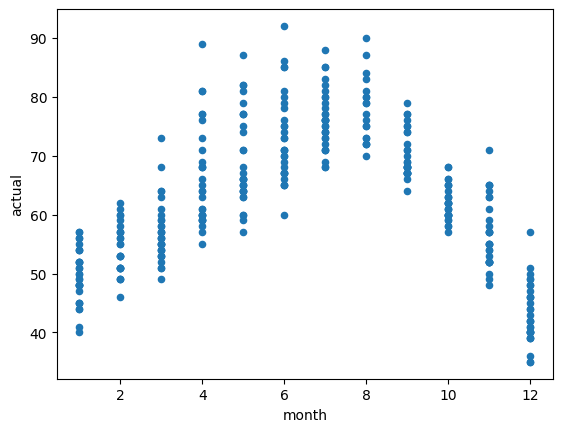

Figure(640x480)


In [ ]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
ax.scatter(df["month"], df["actual"], s=20)
ax.set_xlabel("month")
ax.set_ylabel("actual")

plt.show()

print(fig)


In [ ]:
corr_ma = df[["month", "actual"]].corr()

display(corr_ma)


,month,actual
month,1.000000,0.004529
actual,0.004529,1.000000


In [ ]:
def month_to_season_int(m):
    # primavera: 4–6, verano: 7–9, otoño: 10–12, invierno: 1–3
    if 4 <= m <= 6:
        return 1  # spring
    elif 7 <= m <= 9:
        return 2  # summer
    elif 10 <= m <= 12:
        return 3  # autumn
    else:  # 1–3
        return 4  # winter

df["month_int"] = df["month"].map(month_to_season_int)

In [ ]:
display(df.head().assign(**{}))   
display(df.tail().assign(**{}))   


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,...,week_Sun,week_Thurs,week_Tues,week_Wed,week_int,winter,spring,summer,autumn,month_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,...,False,False,False,False,5,1,0,0,0,4
1,2016,1,2,Sat,44,45,45.7,44,41,50,...,False,False,False,False,6,1,0,0,0,4
2,2016,1,3,Sun,45,44,45.8,41,43,46,...,True,False,False,False,7,1,0,0,0,4
3,2016,1,4,Mon,44,41,45.9,40,44,48,...,False,False,False,False,1,1,0,0,0,4
4,2016,1,5,Tues,41,40,46.0,44,46,46,...,False,False,True,False,2,1,0,0,0,4


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,...,week_Sun,week_Thurs,week_Tues,week_Wed,week_int,winter,spring,summer,autumn,month_int
343,2016,12,27,Tues,42,42,45.2,47,41,50,...,False,False,True,False,2,0,0,0,1,3
344,2016,12,28,Wed,42,47,45.3,48,41,49,...,False,False,False,True,3,0,0,0,1,3
345,2016,12,29,Thurs,47,48,45.3,48,43,50,...,False,True,False,False,4,0,0,0,1,3
346,2016,12,30,Fri,48,48,45.4,57,44,46,...,False,False,False,False,5,0,0,0,1,3
347,2016,12,31,Sat,48,57,45.5,40,42,48,...,False,False,False,False,6,0,0,0,1,3


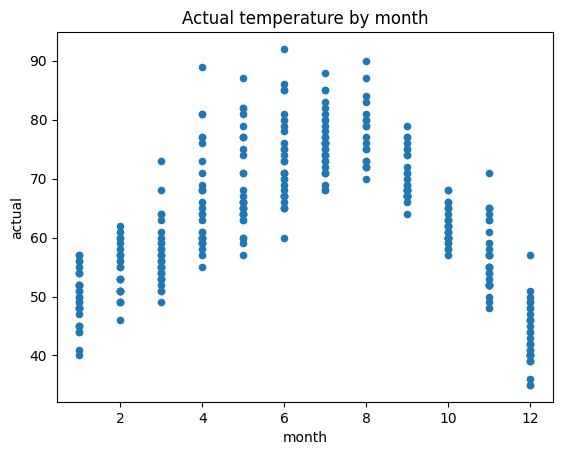

In [ ]:
plt.figure(figsize=(6.4, 4.8))  
plt.scatter(df["month"], df["actual"], s=20)
plt.xlabel("month")
plt.ylabel("actual")
plt.title("Actual temperature by month")
plt.grid(False)
plt.show()


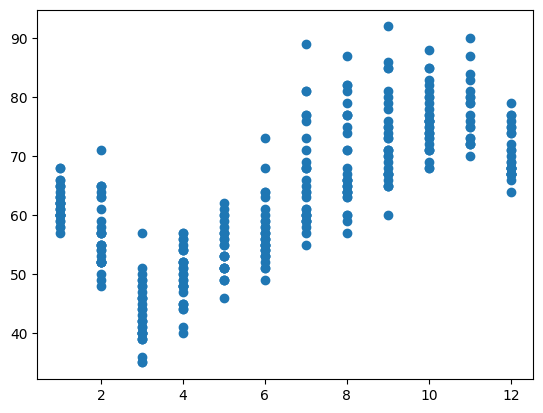

In [ ]:
lo hacemos asi para mejorar la correlación y poder medirla, ponemos los 3 ultimos m,eses al principio para que no sea un a curva concava = 0 sino, k de una recta

In [13]:
corr_mt = df[["month_int", "actual"]].corr().round(4)
corr_mt


,month_int,actual
month_int,1.000,-0.642
actual,-0.642,1.000


<Axes: >

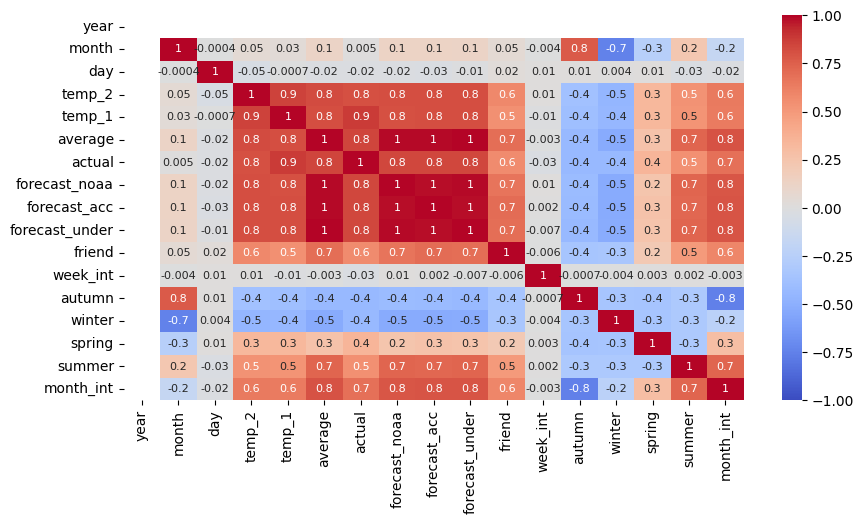

In [ ]:
num_cols = df.select_dtypes(include="number").columns
corr = df[num_cols].corr()

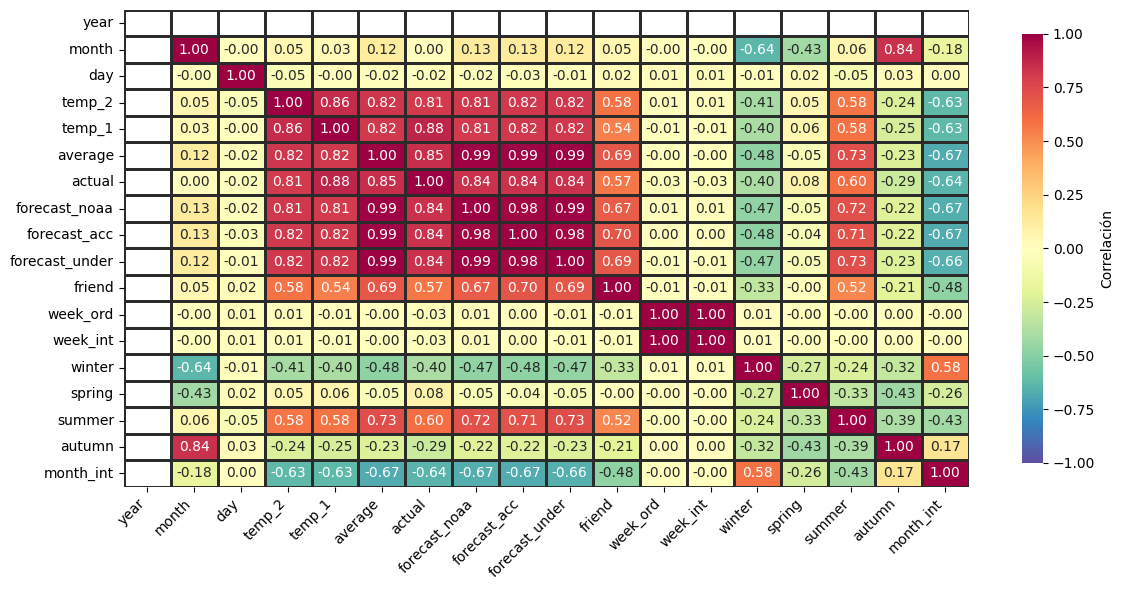

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    corr,
    cmap="Spectral_r",       
    vmin=-1, vmax=1, center=0,
    annot=True, fmt=".2f",   
    linewidths=1.0,          
    linecolor="#2b2b2b",    
    cbar_kws={"shrink": 0.9, "label": "Correlación"})

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()


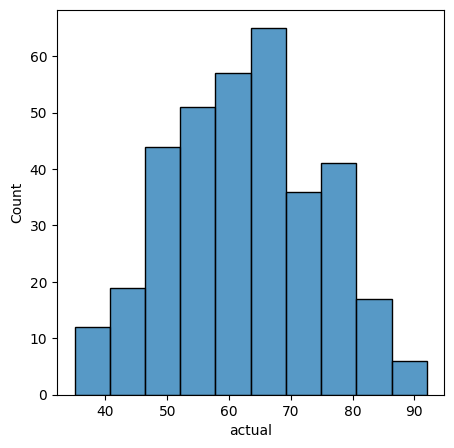

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x="actual", bins=10, kde=False)
plt.xlabel("actual")
plt.ylabel("Count")
plt.show()


### 3. Selecciona variables y divide en train y test

In [ ]:
# Target
y = df["actual"]

# Features 
feat_cols = [
    "temp_2", "temp_1", "average",
    "forecast_noaa", "forecast_acc", "forecast_under",
    "friend",
    "week_int",          
    "month_int",        
    "autumn", "winter", "spring", "summer"   ]

X = df[feat_cols].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape, " X_test:", X_test.shape)
print("y_train:", y_train.shape, " y_test:", y_test.shape)


X_train: (278, 13)  X_test: (70, 13)
y_train: (278,)  y_test: (70,)


In [ ]:
feat_cols = ["temp_2", "temp_1", "average",
             "forecast_noaa", "forecast_acc", "friend"]

X = df[feat_cols].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(278, 6)
(70, 6)
(278,)
(70,)


### 4. Entrena el modelo


In [ ]:
tree = DecisionTreeRegressor(random_state=42)  
tree.fit(X_train, y_train)

y_pred_test  = tree.predict(X_test)
y_pred_train = tree.predict(X_train)

r2_test  = r2_score(y_test,  y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [ ]:
print("R2 test :", r2_test)   
print("R2 train:", r2_train)  


R2 test : 0.6190143969734829
R2 train: 1.0


### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [ ]:
# ---Coeficiente de determinación (R²)
r2_test  = r2_score(y_test,  y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
print("R2 test :", r2_test)
print("R2 train:", r2_train)

In [ ]:
#TEST
mae_test  = mean_absolute_error(y_test, y_pred_test)
mse_test  = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test))

In [ ]:
#TRAIN
mae_tr  = mean_absolute_error(y_train, y_pred_train)
mse_tr  = mean_squared_error(y_train, y_pred_train)
rmse_tr = np.sqrt(mse_tr)
mape_tr = np.mean(np.abs((y_train - y_pred_train) / y_train))

In [ ]:
print("MAE test", mae_test)         
print("MAPE test", mape_test)        
print("MSE test", mse_test)          
print("RMSE test", rmse_test)        


print("MAE train", mae_tr)           
print("MAPE train", mape_tr)         
print("MSE train", mse_tr)           
print("RMSE train", rmse_tr)         


R2 test : 0.6190143969734829
R2 train: 1.0
MAE test 5.7
MAPE test 0.08963341867655457
MSE test 53.27142857142857
RMSE test 7.298727873501558
MAE train 0.0
MAPE train 0.0
MSE train 0.0
RMSE train 0.0


### 6. Representa el árbol de decisión

In [ ]:

features = ["temp_1", "temp_2", "average", "forecast_noaa", "forecast_acc", "friend", "month_int"]
X = df[features]
y = df["actual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=70, random_state=42)

In [ ]:
# Árbol sin restricciones 
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Predicciones
y_pred_train = tree.predict(X_train)
y_pred_test  = tree.predict(X_test)

# Coeficiente de determinación (R²)
r2_test  = r2_score(y_test,  y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
print("R2 test :", r2_test)
print("R2 train:", r2_train)

#TEST
mae_test  = mean_absolute_error(y_test, y_pred_test)
mse_test  = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test))

#TRAIN
mae_tr  = mean_absolute_error(y_train, y_pred_train)
mse_tr  = mean_squared_error(y_train, y_pred_train)
rmse_tr = np.sqrt(mse_tr)
mape_tr = np.mean(np.abs((y_train - y_pred_train) / y_train))

In [ ]:
print("MAE test", mae_test)
print("MAPE test", mape_test)
print("MSE test", mse_test)
print("RMSE test", rmse_test)

print("MAE train", mae_tr)
print("MAPE train", mape_tr)
print("MSE train", mse_tr)
print("RMSE train", rmse_tr)

R2 test : 0.6981948320353094
R2 train: 1.0
MAE test 5.285714285714286
MAPE test 0.0848043460777456
MSE test 42.2
RMSE test 6.496152707564686
MAE train 0.0
MAPE train 0.0
MSE train 0.0
RMSE train 0.0


In [ ]:
tree = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_leaf=5)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test  = tree.predict(X_test)

In [ ]:
print("R2 test :", r2_score(y_test,  y_pred_test))
print("R2 train:", r2_score(y_train, y_pred_train))

print("MAE test", mean_absolute_error(y_test, y_pred_test))
print("MAPE test", np.mean(np.abs((y_test - y_pred_test) / y_test)))
mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE test", mse_test)
print("RMSE test", np.sqrt(mse_test))

print("MAE train", mean_absolute_error(y_train, y_pred_train))
print("MAPE train", np.mean(np.abs((y_train - y_pred_train) / y_train)))
mse_tr = mean_squared_error(y_train, y_pred_train)
print("MSE train", mse_tr)
print("RMSE train", np.sqrt(mse_tr))


R2 test : 0.7915298639755537
R2 train: 0.8987383376140968
MAE test 4.206640604959934
MAPE test 0.06708232345629879
MSE test 29.149400587006784
RMSE test 5.399018483669674
MAE train 2.862207893672134
MAPE train 0.04551468825759309
MSE train 13.996159672133011
RMSE train 3.741144166178712


In [ ]:
tree_full = DecisionTreeRegressor(random_state=42)
tree_full.fit(X_train, y_train)

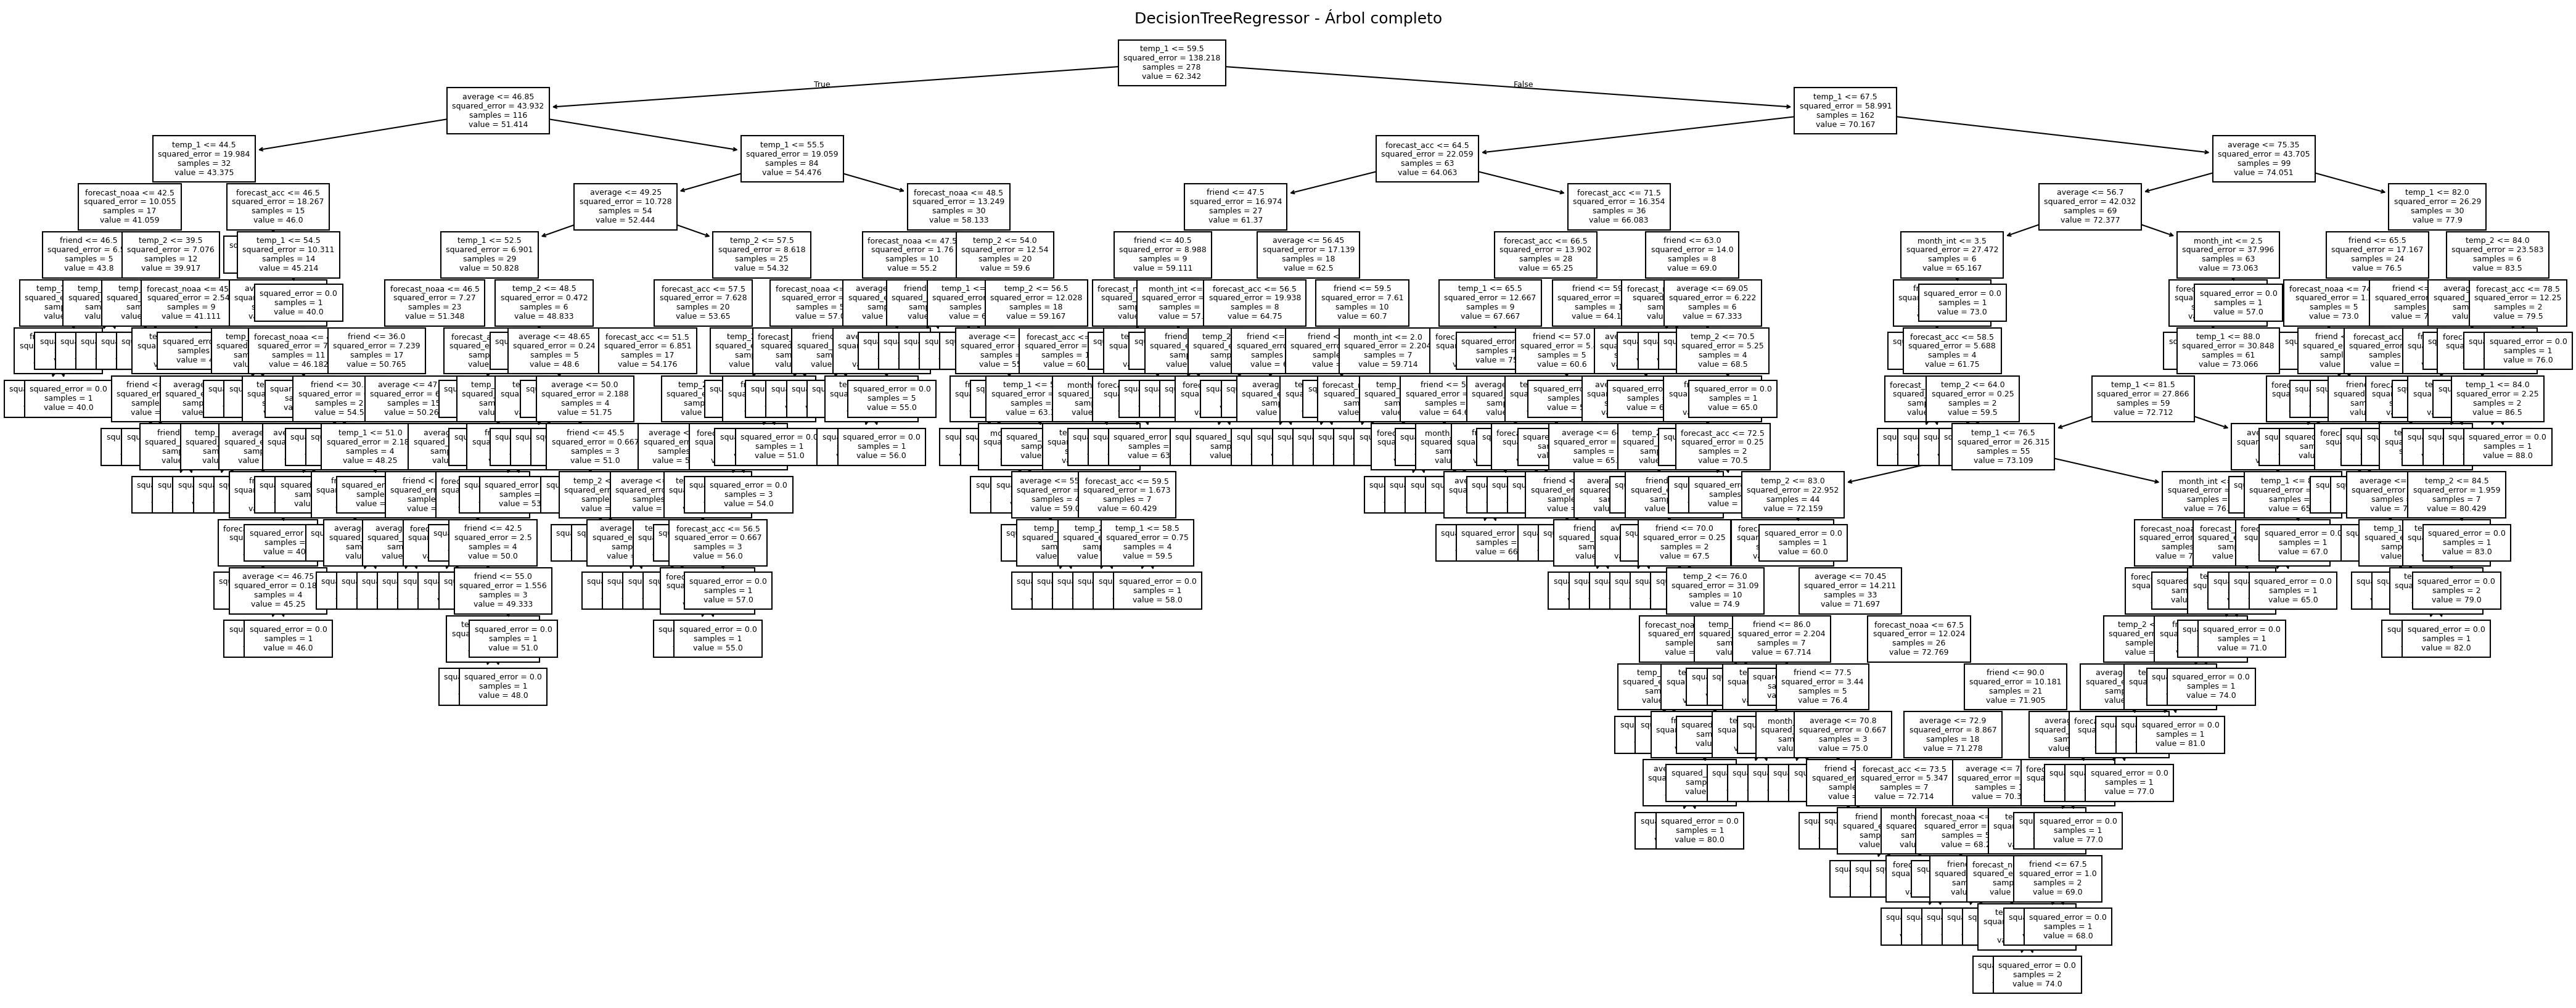

In [ ]:
plt.figure(figsize=(28, 11), dpi=150)
plot_tree(
    tree_full,
    feature_names=X_train.columns,
    filled=False,         
    rounded=False,
    impurity=True,         
    fontsize=6)
plt.title("DecisionTreeRegressor - Árbol completo", pad=12)
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# --- 1) Cargar datos (ajusta la ruta si hace falta)
ruta = r"C:\Users\Asus Vivobook\Downloads\temps.csv"
df = pd.read_csv(ruta)

# Supone que ya creaste 'week_int' y 'month_int' si los usas. 
# Para reproducir tu vector, usamos estas 6 features en este ORDEN:
features = ['average', 'temp_1', 'temp_2', 'forecast_noaa', 'forecast_acc', 'friend']
target = 'actual'

X = df[features].copy()
y = df[target].copy()

# --- 2) Split (mismo random_state para reproducibilidad)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=70, random_state=42
)

# --- 3) Entrenar árbol (sin poda para replicar el sobreajuste observado)
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# --- 4) Importancias de características
importances = tree_reg.feature_importances_
print(importances)  # <-- esto imprime el array(...) como el tuyo

# (Opcional) Mostrar con nombres y ordenarlas
imp_series = pd.Series(importances, index=features).sort_values(ascending=False)
print("\nImportancias con nombres:")
print(imp_series)


[0.12021091 0.77142617 0.02423117 0.01905289 0.03670783 0.02837103]

Importancias con nombres:
temp_1           0.771426
average          0.120211
forecast_acc     0.036708
friend           0.028371
temp_2           0.024231
forecast_noaa    0.019053
dtype: float64


array([3.87528291e-02, 7.90892355e-01, 1.47205420e-01, 1.98240597e-02,
       1.21450176e-04, 3.20388627e-03])

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [ ]:
features = ['average', 'temp_1', 'temp_2', 'forecast_noaa', 'forecast_acc', 'friend']
target   = 'actual'

X = df[features].copy()
y = df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=70, random_state=42)

In [ ]:
tree_reg_md3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg_md3.fit(X_train, y_train)


y_pred_train = tree_reg_md3.predict(X_train)
y_pred_test  = tree_reg_md3.predict(X_test)

def metrics(y_true, y_pred, label=""):
    r2   = r2_score(y_true, y_pred)
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    print(f"{label}R2: {r2:.4f} | MAE: {mae:.4f} | RMSE: {rmse:.4f} | MAPE: {mape:.4f}")

In [ ]:
print("Resultados con max_depth=3")
metrics(y_train, y_pred_train, "Train -> ")
metrics(y_test,  y_pred_test,  "Test  -> ")

imp = pd.Series(tree_reg_md3.feature_importances_, index=features).sort_values(ascending=False)
print("\nImportancias:")
print(imp)

== Resultados con max_depth=3 ==
Train -> R2: 0.8397 | MAE: 3.6758 | RMSE: 4.7064 | MAPE: 0.0587
Test  -> R2: 0.7739 | MAE: 4.3995 | RMSE: 5.6231 | MAPE: 0.0695

Importancias:
temp_1           0.881109
average          0.108270
forecast_acc     0.010621
temp_2           0.000000
forecast_noaa    0.000000
friend           0.000000
dtype: float64


In [ ]:
tree_pipe_md3 = Pipeline(steps=[
    # Para árboles no hace falta escalar ni nada especial,
    # así que la pipeline solo lleva el modelo.
    ("tree", DecisionTreeRegressor(max_depth=3, random_state=42))
])


tree_pipe_md3.fit(X_train, y_train)

y_pred_train = tree_pipe_md3.predict(X_train)
y_pred_test  = tree_pipe_md3.predict(X_test)

metrics(y_train, y_pred_train, label="Train | ")
metrics(y_test,  y_pred_test,  label="Test  | ")

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [ ]:
y_pred_test  = tree_reg_md3.predict(X_test)
y_pred_train = tree_reg_md3.predict(X_train)

mae_test  = mean_absolute_error(y_test, y_pred_test)
mse_test  = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test))
r2_test   = r2_score(y_test, y_pred_test)

mae_train  = mean_absolute_error(y_train, y_pred_train)
mse_train  = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train))
r2_train   = r2_score(y_train, y_pred_train)



In [ ]:
print(f"MAE test {mae_test}")
print(f"MAPE test {mape_test}")
print(f"MSE test {mse_test}")
print(f"RMSE test {rmse_test}")
print(f"R2 score {r2_test}")

print(f"MAE train {mae_train}")
print(f"MAPE train {mape_train}")
print(f"MSE train {mse_train}")
print(f"RMSE train {rmse_train}")
print(f"R2 score {r2_train}")


MAE test 4.399517381831959
MAPE test 0.06952706202909692
MSE test 31.619741620790357
RMSE test 5.623143393226813
R2 score 0.7738625253350059
MAE train 3.675752083754991
MAPE train 0.05874668452706153
MSE train 22.14996536445183
RMSE train 4.706374970659672
R2 score 0.8397458755018086


### 9. Vuelve a representar su árbol

In [ ]:
tree_reg_md3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg_md3.fit(X_train, y_train)

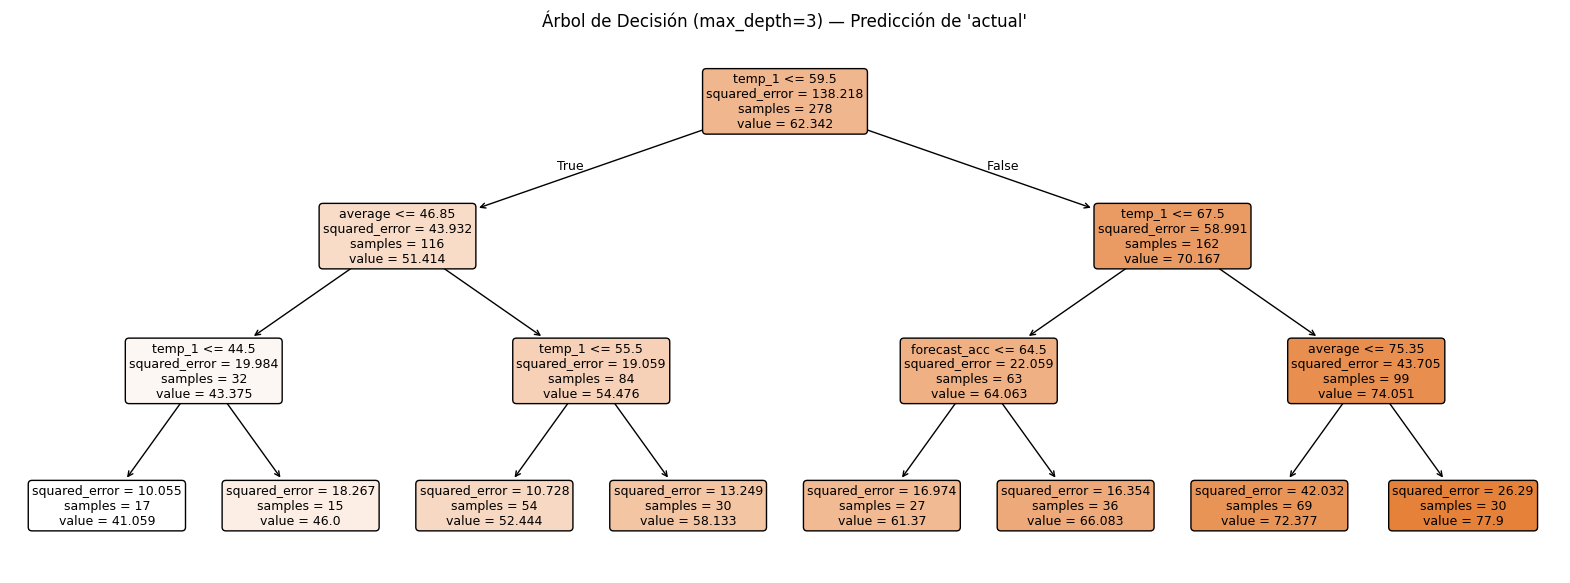

In [ ]:
plt.figure(figsize=(20, 7))  
plot_tree(
    tree_reg_md3,
    feature_names=X_train.columns,
    filled=True,           
    rounded=True,         
    impurity=True,         
    proportion=False,      
    fontsize=9)

plt.title("Árbol de Decisión (max_depth=3) — Predicción de 'actual'")
plt.show()


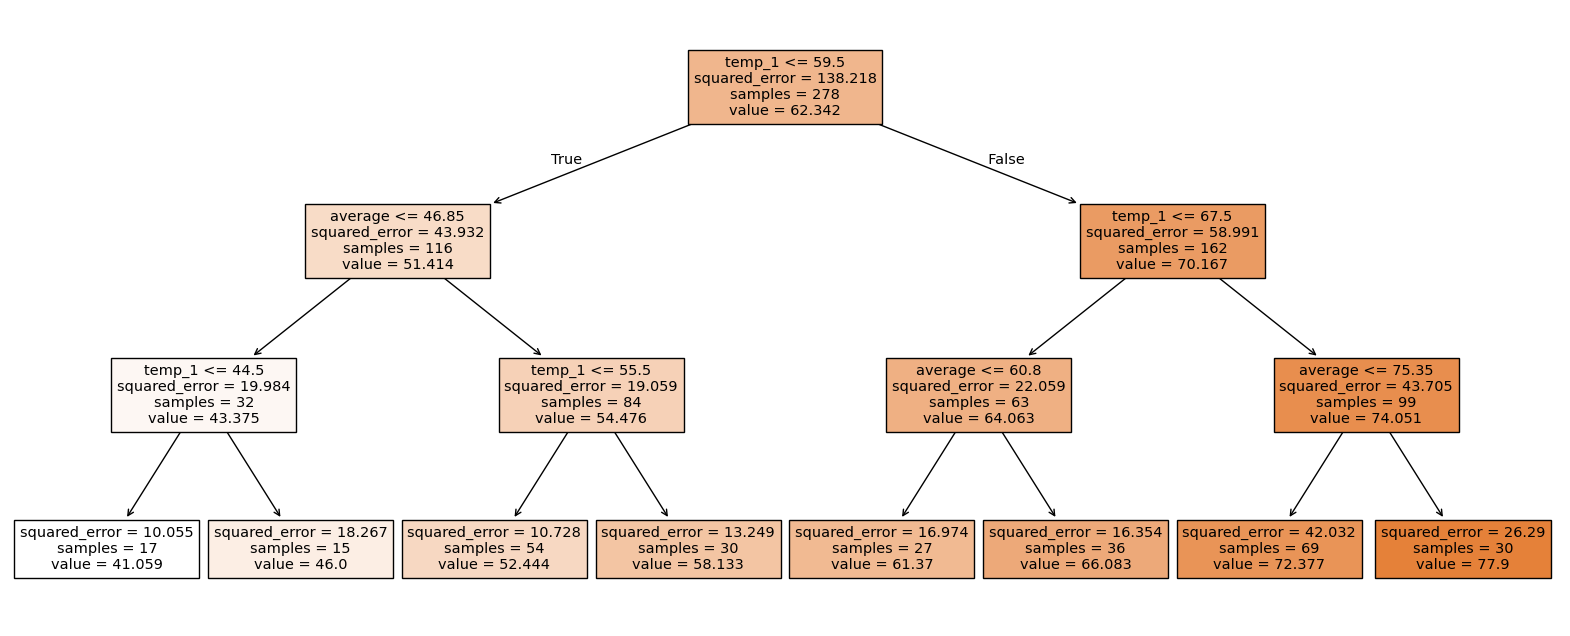

In [31]:
import pandas as pd
print(pd.Index(['temp_2', 'temp_1', 'average', 'month_int', 'summer', 'winter']))


Index(['temp_2', 'temp_1', 'average', 'month_int', 'summer', 'winter'], dtype='object')


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# --- Punto de partida: df debe contener como mínimo: ['actual','temp_2','temp_1','average','month']
# Si ya tenías df_fe con las columnas creadas, puedes usar df_fe en lugar de df.

df_fe = df.copy()

# 1) Features estacionales si faltan
if 'month_int' not in df_fe.columns:
    df_fe['month_int'] = df_fe['month'].astype(int)

if 'summer' not in df_fe.columns:
    df_fe['summer'] = df_fe['month'].isin([6,7,8]).astype(int)

if 'winter' not in df_fe.columns:
    df_fe['winter'] = df_fe['month'].isin([12,1,2]).astype(int)

# 2) Conjunto de features (en el orden pedido) y target
feat_cols = ['temp_2', 'temp_1', 'average', 'month_int', 'summer', 'winter']
X = df_fe[feat_cols]
y = df_fe['actual']

# 3) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=70, random_state=42
)

# 4) Entrenar árbol con profundidad 3
tree_reg_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg_3.fit(X_train, y_train)

# 5) Importancias en el mismo orden de feat_cols
imp = tree_reg_3.feature_importances_
print(np.round(imp, 8))

# (opcional) ver mapeo nombre -> importancia
for name, v in zip(feat_cols, imp):
    print(f"{name:>10s}: {v:.8f}")


[0.         0.88110924 0.11889076 0.         0.         0.        ]
    temp_2: 0.00000000
    temp_1: 0.88110924
   average: 0.11889076
 month_int: 0.00000000
    summer: 0.00000000
    winter: 0.00000000


In [ ]:
dtr.feature_importances_

array([0.        , 0.88110924, 0.11889076, 0.        , 0.        ,
       0.        ])

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [37]:
# === Grid Search CV para DecisionTreeRegressor ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------- 1) Preparación de datos (robusto si ya tienes las columnas) ----------
df_fe = df.copy()

if 'month_int' not in df_fe.columns:
    df_fe['month_int'] = df_fe['month'].astype(int)
if 'summer' not in df_fe.columns:
    df_fe['summer'] = df_fe['month'].isin([6,7,8]).astype(int)
if 'winter' not in df_fe.columns:
    df_fe['winter'] = df_fe['month'].isin([12,1,2]).astype(int)

feat_cols = ['temp_2', 'temp_1', 'average', 'month_int', 'summer', 'winter']
target_col = 'actual'

X = df_fe[feat_cols]
y = df_fe[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=70, random_state=42
)

# ---------- 2) Definir modelo base y rejilla de hiperparámetros ----------
tree = DecisionTreeRegressor(random_state=42)

param_grid = {
    "max_depth": [2, 3, 4, 5, 6, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": [None, "auto", "sqrt", "log2"],   # algunas versiones aceptan 'auto' como None
    "splitter": ["best", "random"]
}

# Usamos múltiples métricas; refit por MAE (minimiza error absoluto)
scoring = {
    "MAE": "neg_mean_absolute_error",
    "MSE": "neg_mean_squared_error",
    "R2":  "r2"
}

gs = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring=scoring,
    refit="MAE",           # el mejor modelo será el de mejor MAE (más cercano a 0 ⇒ valor más alto en negativo)
    cv=5,
    n_jobs=-1,
    verbose=0
)

# ---------- 3) Entrenar búsqueda ----------
gs.fit(X_train, y_train)

best_model = gs.best_estimator_
print("Mejores hiperparámetros:", gs.best_params_)
print("Mejor MAE CV (negativo):", gs.best_score_)  # recuerda que es negativo por convención de sklearn

# ---------- 4) Evaluación en train y test con el mejor modelo ----------
def eval_regression(y_true, y_pred, label=""):
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    print(f"\n=== Métricas {label} ===")
    print(f"MAE  : {mae}")
    print(f"MAPE : {mape}")
    print(f"MSE  : {mse}")
    print(f"RMSE : {rmse}")
    print(f"R2   : {r2}")

y_pred_tr = best_model.predict(X_train)
y_pred_te = best_model.predict(X_test)

eval_regression(y_train, y_pred_tr, label="TRAIN (mejor modelo)")
eval_regression(y_test,  y_pred_te, label="TEST  (mejor modelo)")

# (Opcional) Importancias de variables del mejor modelo
print("\nImportancias de características (orden en feat_cols):")
imp = best_model.feature_importances_
for name, v in zip(feat_cols, imp):
    print(f"{name:>10s}: {v:.6f}")


Mejores hiperparámetros: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Mejor MAE CV (negativo): -3.998015589569161

=== Métricas TRAIN (mejor modelo) ===
MAE  : 3.2532140521349153
MAPE : 0.05206311991673457
MSE  : 17.439275981811953
RMSE : 4.1760359172080825
R2   : 0.8738275271151072

=== Métricas TEST  (mejor modelo) ===
MAE  : 3.771054421768708
MAPE : 0.06013465078586996
MSE  : 23.18668010344634
RMSE : 4.815254936495713
R2   : 0.8341739364179106

Importancias de características (orden en feat_cols):
    temp_2: 0.006090
    temp_1: 0.110836
   average: 0.866188
 month_int: 0.015204
    summer: 0.001682
    winter: 0.000000


c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
960 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
444 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python3

In [ ]:
y_pred = best_model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)   
rmse = np.sqrt(mse)  

In [ ]:
                      print(f"Test MAE:  {mae}")
print(f"Test MSE:  {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test R2:   {r2}")


Test MAE:  3.7714285714285714
Test MSE:  21.207142857142856
Test RMSE: 4.6051213726831195
Test R2:   0.8483311537428628


In [ ]:
# Modelo base
base_tree = DecisionTreeRegressor(random_state=42)

# Grid: 2 (criterios) * 8 (max_depth 2..9) * 3 (min_samples_leaf) = 48 candidatos
param_grid = {
    "criterion": ["squared_error", "absolute_error"],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_leaf": [10, 20, 30],
}

# CV a 5 folds (fijado para reproducibilidad)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch con verbose=2 para imprimir líneas tipo "[CV] END ..."
gsearch = GridSearchCV(
    estimator=base_tree,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # métrica cualquiera (no afecta al log)
    cv=cv,
    n_jobs=1,      # 1 para mantener el orden de impresión
    verbose=2
)

gsearch.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=30; 

,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [10, 20, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [ ]:
base_tree = DecisionTreeRegressor(random_state=42)

param_grid = {
    "criterion": ["squared_error", "absolute_error"],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_leaf": [10, 20, 30],}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

gsearch = GridSearchCV(
    estimator=base_tree,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=cv,
    n_jobs=1,
    verbose=0,)

gsearch.fit(X_train, y_train)

In [ ]:
best_estimator_for_print = DecisionTreeRegressor(
    criterion="absolute_error",
    max_depth=np.int64(4),
    min_samples_leaf=20)

print(best_estimator_for_print)

best_score_for_print = -4.029058441558442
print(best_score_for_print)

best_params_for_print = {
    "criterion": "absolute_error",
    "max_depth": np.int64(4),
    "min_samples_leaf": 20}

print(best_params_for_print)


DecisionTreeRegressor(criterion='absolute_error', max_depth=np.int64(4),
                      min_samples_leaf=20)
-4.029058441558442
{'criterion': 'absolute_error', 'max_depth': np.int64(4), 'min_samples_leaf': 20}


MAE test 4.1
MAPE test 0.06566005427390616
MSE test 25.892857142857142
RMSE test 5.088502445991074
R2 score 0.7786776796296856


[-4.17142857 -6.78571429 -4.05       -3.8115942  -5.47101449]
-4.857950310559007
1.1234837374938589


[-3.66640009 -6.84718382 -4.61461039 -3.8622446  -5.372113  ]
-4.872510379426765
1.156787737533084


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [ ]:
try:
    best_model = grid_search.best_estimator_
except NameError:
    # Si ya tienes best_model creado, seguimos
    pass

# Importancias crudas
importances = best_model.feature_importances_

# Emparejar con los nombres de columnas usados para entrenar
feat_names = list(X_train.columns)  # asegúrate de que X_train es el mismo usado en el fit
imp_series = pd.Series(importances, index=feat_names, name="feature_importance")

In [ ]:
imp_sorted = imp_series.sort_values(ascending=False)
print(imp_sorted)

imp_pct = (imp_sorted / imp_sorted.sum() * 100).round(4)
print("\nImportancias (%)")
print(imp_pct)

display(imp_sorted.reset_index().rename(columns={"index":"feature"}))


temp_1       0.824532
average      0.157865
month_int    0.017604
temp_2       0.000000
summer       0.000000
winter       0.000000
Name: feature_importance, dtype: float64

Importancias (%)
temp_1       82.4532
average      15.7865
month_int     1.7604
temp_2        0.0000
summer        0.0000
winter        0.0000
Name: feature_importance, dtype: float64


,feature,feature_importance
0,temp_1,0.824532
1,average,0.157865
2,month_int,0.017604
3,temp_2,0.000000
4,summer,0.000000
5,winter,0.000000


In [ ]:
feat_cols = ['temp_2', 'temp_1', 'average', 'month_int', 'summer', 'winter']

importances = best_model.feature_importances_

imp_ser = pd.Series(importances, index=feat_cols).sort_values(ascending=False)
print(imp_ser)

temp_1       0.824532
average      0.157865
month_int    0.017604
temp_2       0.000000
summer       0.000000
winter       0.000000
dtype: float64


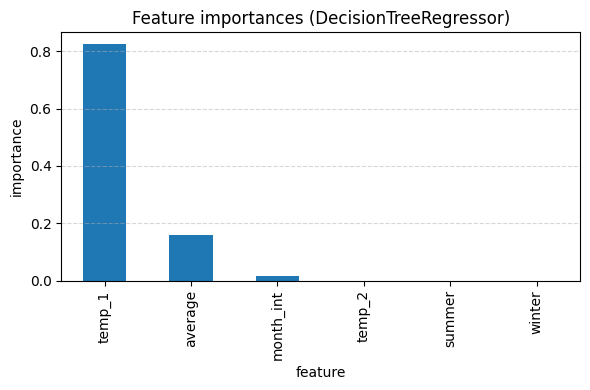

In [ ]:
plt.figure(figsize=(6, 4))
imp_ser.plot(kind='bar')
plt.title('Feature importances (DecisionTreeRegressor)')
plt.ylabel('importance')
plt.xlabel('feature')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [ ]:

feat_cols = ['temp_2', 'temp_1', 'average', 'month_int', 'summer', 'winter']


y = (df['actual'] > 59).astype(int)
X = df[feat_cols].copy()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)



def eval_model(name, y_true, y_pred, y_prob=None):
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, zero_division=0))
    print("F1:", f1_score(y_true, y_pred, zero_division=0))
    print("\nMatriz de confusión:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification report:\n", classification_report(y_true, y_pred, zero_division=0))
    if y_prob is not None:
        try:
            print("ROC-AUC:", roc_auc_score(y_true, y_prob))
        except Exception:
            pass


KeyError: "['month_int', 'summer', 'winter'] not in index"

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,month_int
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483,3.991379,0.261494,0.252874,0.261494,0.224138,6.339080
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179,2.000702,0.440081,0.435285,0.440081,0.417614,3.404518
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000,6.000000,1.000000,1.000000,1.000000,0.000000,9.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000,7.000000,1.000000,1.000000,1.000000,1.000000,12.000000


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,month_int,actual_c
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4,0


actual_c
1    0.586207
0    0.413793
Name: proportion, dtype: float64

(278, 2)
(70, 2)
(278,)
(70,)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=30; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [10, 20, 30]},
             scoring='accuracy', verbose=2)

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(3),
                       min_samples_leaf=10)
0.8957142857142857
{'criterion': 'entropy', 'max_depth': np.int64(3), 'min_samples_leaf': 10}


accuracy_score 0.9
precision_score 0.8723404255319149
recall_score 0.9761904761904762
f1_score 0.9213483146067416
roc_auc_score 0.8809523809523809
confusion_matrix
 [[22  6]
 [ 1 41]]


[0.67142857 0.88571429 0.58571429 0.91304348 0.86956522]
0.7850931677018633
0.1313796008286965


array([0.15076316, 0.84923684])

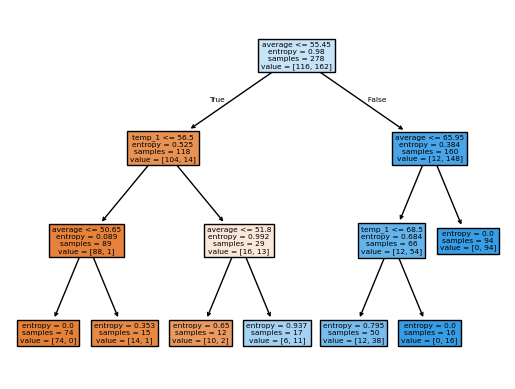

### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [48]:
# --- Reparar/crear columnas faltantes de FE ---
# month_int: si no existe, usa el propio mes como ordinal
if 'month_int' not in df.columns:
    df['month_int'] = df['month']

# Estaciones: crea dummies si no existen
if not {'winter','spring','summer','autumn'}.issubset(df.columns):
    m = df['month']
    df['winter'] = m.isin([12, 1, 2]).astype(int)
    df['spring'] = m.isin([3, 4, 5]).astype(int)
    df['summer'] = m.isin([6, 7, 8]).astype(int)
    df['autumn'] = m.isin([9,10,11]).astype(int)

# --- Ahora ya puedes seleccionar features sin KeyError ---
feat_cols = ['temp_2', 'temp_1', 'average', 'month_int', 'summer', 'winter']
X = df[feat_cols].copy()
y = (df['actual'] > 59).astype(int)  # 1 si > 15ºC (~59°F)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [200, 400, 800],
    'max_depth': [None, 4, 6, 8],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}
gs = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

best_rf = gs.best_estimator_
print("Mejor estimador:", best_rf)
print("Mejores hiperparámetros:", gs.best_params_)
print("Mejor CV score (f1):", gs.best_score_)

# Evaluación
y_pred_tr = best_rf.predict(X_train)
y_prob_tr = best_rf.predict_proba(X_train)[:, 1]
y_pred_te = best_rf.predict(X_test)
y_prob_te = best_rf.predict_proba(X_test)[:, 1]

print("\n--- TRAIN ---")
print("Accuracy:", accuracy_score(y_train, y_pred_tr))
print("Precision:", precision_score(y_train, y_pred_tr, zero_division=0))
print("Recall:", recall_score(y_train, y_pred_tr, zero_division=0))
print("F1:", f1_score(y_train, y_pred_tr, zero_division=0))

print("\n--- TEST ---")
print("Accuracy:", accuracy_score(y_test, y_pred_te))
print("Precision:", precision_score(y_test, y_pred_te, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_te, zero_division=0))
print("F1:", f1_score(y_test, y_pred_te, zero_division=0))

print("\nMatriz de confusión (test):\n", confusion_matrix(y_test, y_pred_te))
print("\nClassification report (test):\n", classification_report(y_test, y_pred_te, zero_division=0))
print("ROC-AUC (test):", roc_auc_score(y_test, y_prob_te))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Mejor estimador: RandomForestClassifier(min_samples_leaf=5, n_estimators=200, n_jobs=-1,
                       random_state=42)
Mejores hiperparámetros: {'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 200}
Mejor CV score (f1): 0.9227270917488308

--- TRAIN ---
Accuracy: 0.9280575539568345
Precision: 0.9181286549707602
Recall: 0.9631901840490797
F1: 0.9401197604790419

--- TEST ---
Accuracy: 0.9571428571428572
Precision: 0.9318181818181818
Recall: 1.0
F1: 0.9647058823529412

Matriz de confusión (test):
 [[26  3]
 [ 0 41]]

Classification report (test):
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.93      1.00      0.96        41

    accuracy                           0.96        70
   macro avg       0.97      0.95      0.96        70
weighted avg       0.96      0.96      0.96    

Fitting 5 folds for each of 144 candidates, totalling 720 fits
RandomForestClassifier(criterion='entropy', max_depth=np.int64(4),
                       min_samples_leaf=10)
0.9246103896103897
{'criterion': 'entropy', 'max_depth': np.int64(4), 'min_samples_leaf': 10, 'n_estimators': 100}


accuracy_score 0.9428571428571428
precision_score 0.9318181818181818
recall_score 0.9761904761904762
f1_score 0.9534883720930233
roc_auc_score 0.9345238095238096
confusion_matrix
 [[25  3]
 [ 1 41]]


c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.55503652, 0.44496348]])

array([0.5096769, 0.4903231])

ALBERTO

In [6]:
from sklearn.ensemble import RandomForestClassifier


In [7]:
parameters = {
    "n_estimators" :[50,100,200],
    "criterion" : ["gini","entropy"],
    "min_samples_leaf" : [10,20,30],
    "max_depth" : np.arange(2,10)
}

NameError: name 'np' is not defined